In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import pandas as pd
import pickle

import bacco
import baccoemu

import sys
sys.path.append('/dipc/kstoreyf/muchisimocks/scripts')
import data_loader
import plotter
import plot_utils
import utils

%load_ext autoreload
%autoreload 2

2025-03-15 01:56:54.583606: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-15 01:56:54.685436: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-15 01:56:54.685476: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-15 01:56:54.698495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-15 01:56:54.729567: I tensorflow/core/platform/cpu_feature_guar

In [2]:
%matplotlib inline
mpl.pyplot.style.use('default')
mpl.pyplot.close('all')

font, rcnew = plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
mpl.pyplot.rcParams.update(rcnew)
#mpl.pyplot.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 

In [3]:
tag_params = '_quijote_p0_n1000'
dir_pnns = f'/scratch/kstoreyf/muchisimocks/data/pnns_mlib/pnns{tag_params}'

In [4]:
idx_LH = 0
fn_pnn = f'{dir_pnns}/pnn_{idx_LH}.npy'
pnn = np.load(fn_pnn, allow_pickle=True)

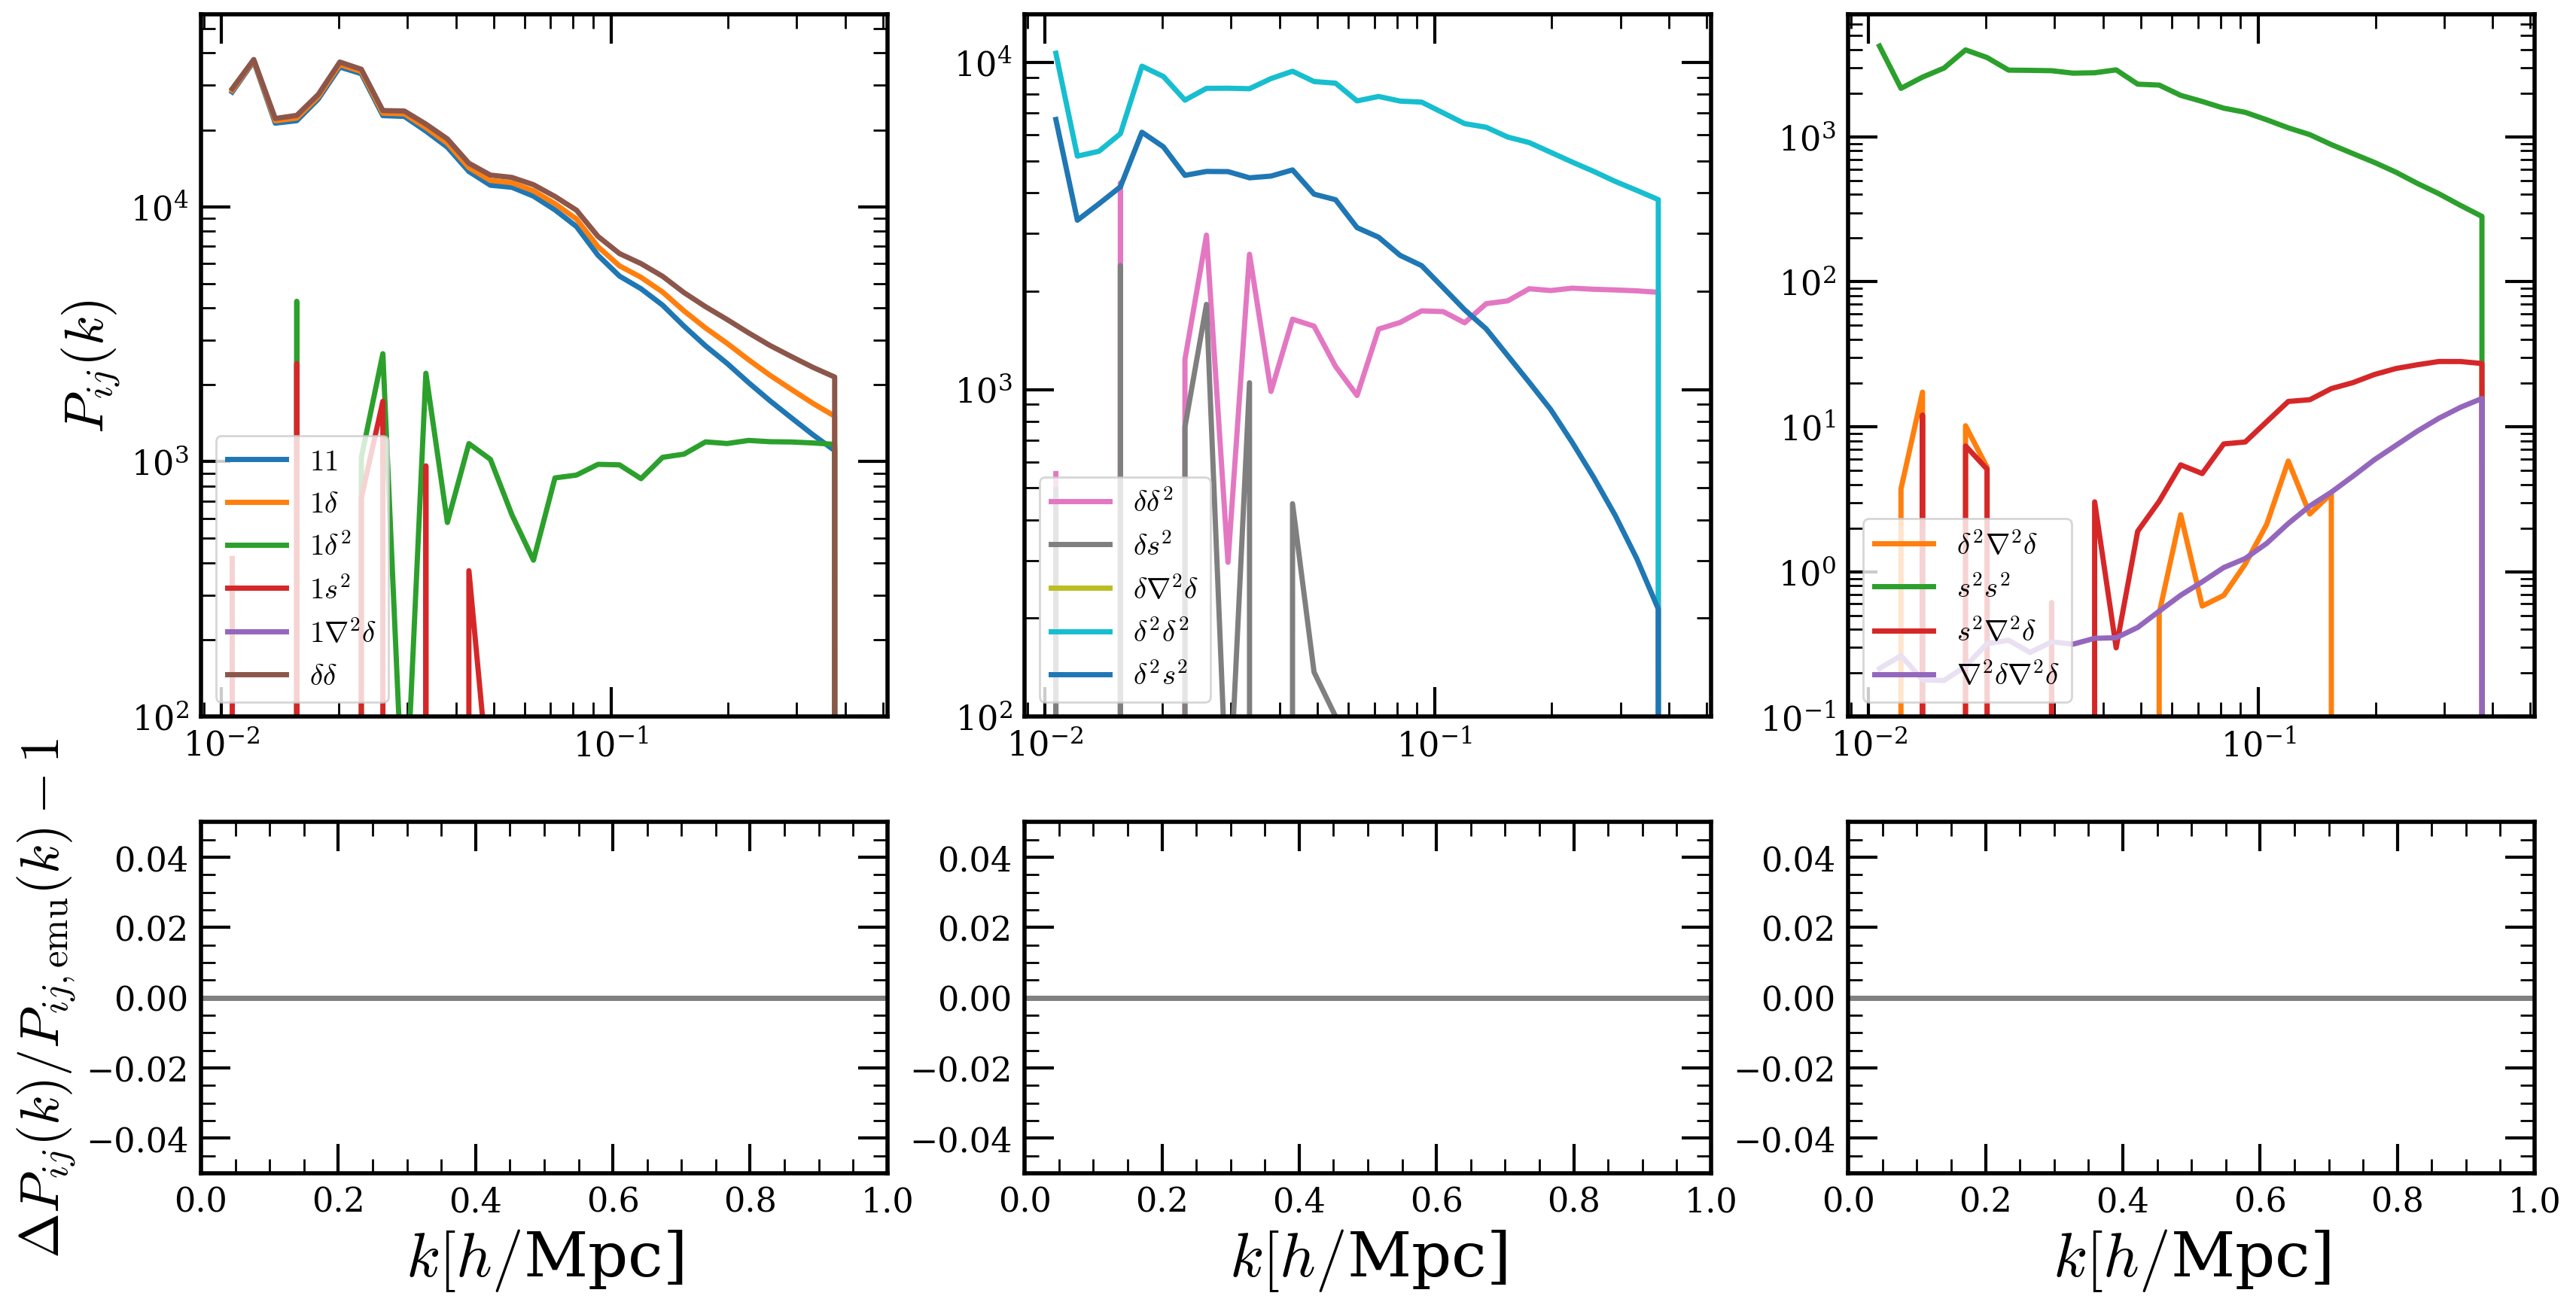

In [5]:
plotter.plot_pnn(pnn)

In [6]:
len(pnn)

15

In [7]:
bias_params = [1,0,0,0]
pk = utils.pnn_to_pk(pnn, bias_params)

In [8]:
import itertools
prod = np.array(list(itertools.combinations_with_replacement(np.arange(5), r=2)))


In [9]:
tag_params = '_quijote_p0_n1000'
tag_biasparams = '_b1000_p0_n1'
#tag_biasparams = '_biaszen_p4_n1000'
tag_mocks = tag_params + tag_biasparams

tag_pk = ''
tag_fields_extra = ''
dir_pks = f'/scratch/kstoreyf/muchisimocks/data/pks_mlib/pks{tag_mocks}{tag_pk}'
fn_pk = f'{dir_pks}/pk_{idx_LH}{tag_fields_extra}.npy'

pk_orig = np.load(fn_pk, allow_pickle=True).item()

/tmp/ipykernel_2498085/3074888660.py:6: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pnn[0]['k'], pk/pk_orig['pk'] - 1.0)


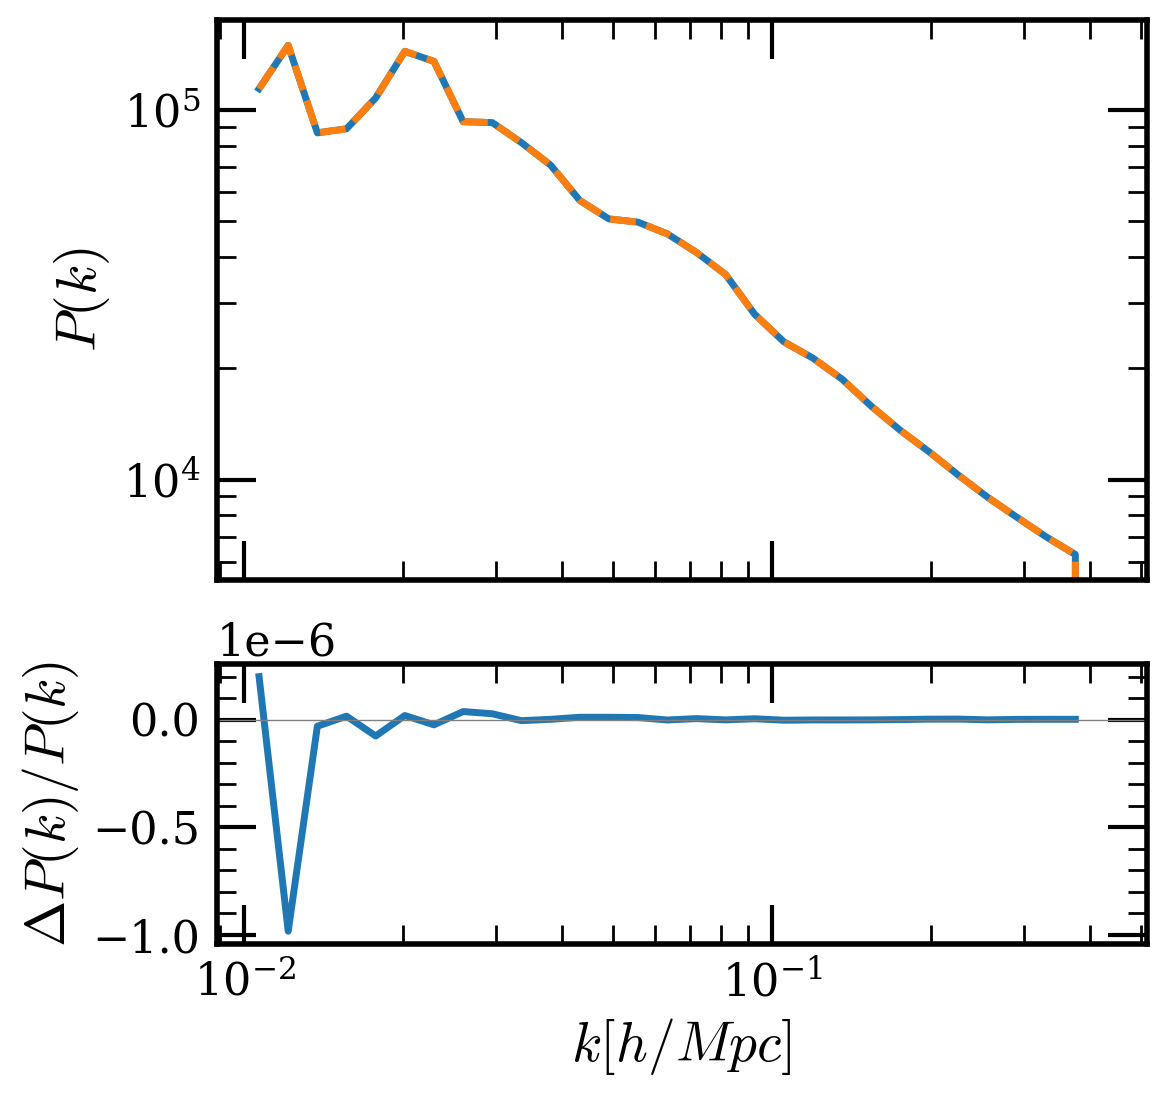

In [10]:
fig, axarr = plt.subplots(2, 1, figsize=(6,6), sharex=True, height_ratios=[2,1])
ax0, ax1 = axarr

ax0.plot(pnn[0]['k'], pk)
ax0.plot(pk_orig['k'], pk_orig['pk'], ls='--')
ax1.plot(pnn[0]['k'], pk/pk_orig['pk'] - 1.0)
ax1.axhline(0, color='grey', lw=0.5)

axarr[-1].set_xlabel(r'$k[h/Mpc]$', size=20)
ax0.set_ylabel(r'$P(k)$', size=20)
ax1.set_ylabel(r'$\Delta P(k)/P(k)$', size=20)

ax0.set_xscale('log')
ax0.set_yscale('log')

## now check random bias value

In [11]:
tag_biasparams = '_biaszen_p4_n1000'
biasparam_names_ordered = ['b1', 'b2', 'bs2', 'bl']
biasparams_df, biasparams_dict_fixed = data_loader.load_bias_params(tag_biasparams)

In [12]:
biasparam_dict = biasparams_dict_fixed.copy()
if biasparams_df is not None:
    biasparam_dict.update(biasparams_df.loc[idx_LH].to_dict())
bias_params = [biasparam_dict[name] for name in biasparam_names_ordered]
print(bias_params)

[1.952678131854332, 1.3342444862409917, 1.5085656083203545, 1.226052639418814]


In [13]:
idx_LH = 0
fn_pnn = f'{dir_pnns}/pnn_{idx_LH}.npy'
pnn = np.load(fn_pnn, allow_pickle=True)
pk = utils.pnn_to_pk(pnn, bias_params)
print(pk)

[313333.18580234 337320.00394989 132764.64168381 284324.29639817
 232679.24617379 326211.77776728 350666.72144239 282144.59114236
 244399.68497043 246576.38497665 200806.85631187 182787.27088577
 160304.69378986 153754.26212345 137002.12008369 131368.52524686
 116418.21657841  99822.49548265  86598.65883227  77112.27608174
  72410.37560557  63915.90981787  58975.73478529  53299.22051576
  48531.61824982  44207.01048333  40652.12310097  37575.5529727
  34906.11167278      0.        ]


In [14]:
print(pk)

[313333.18580234 337320.00394989 132764.64168381 284324.29639817
 232679.24617379 326211.77776728 350666.72144239 282144.59114236
 244399.68497043 246576.38497665 200806.85631187 182787.27088577
 160304.69378986 153754.26212345 137002.12008369 131368.52524686
 116418.21657841  99822.49548265  86598.65883227  77112.27608174
  72410.37560557  63915.90981787  58975.73478529  53299.22051576
  48531.61824982  44207.01048333  40652.12310097  37575.5529727
  34906.11167278      0.        ]


In [15]:
tag_params = '_quijote_p0_n1000'
tag_mocks = tag_params + tag_biasparams

tag_pk = ''
tag_fields_extra = ''
dir_pks = f'/scratch/kstoreyf/muchisimocks/data/pks_mlib/pks{tag_mocks}{tag_pk}'
fn_pk = f'{dir_pks}/pk_{idx_LH}{tag_fields_extra}.npy'

pk_orig = np.load(fn_pk, allow_pickle=True).item()

/tmp/ipykernel_2498085/3074888660.py:6: RuntimeWarning: invalid value encountered in divide
  ax1.plot(pnn[0]['k'], pk/pk_orig['pk'] - 1.0)


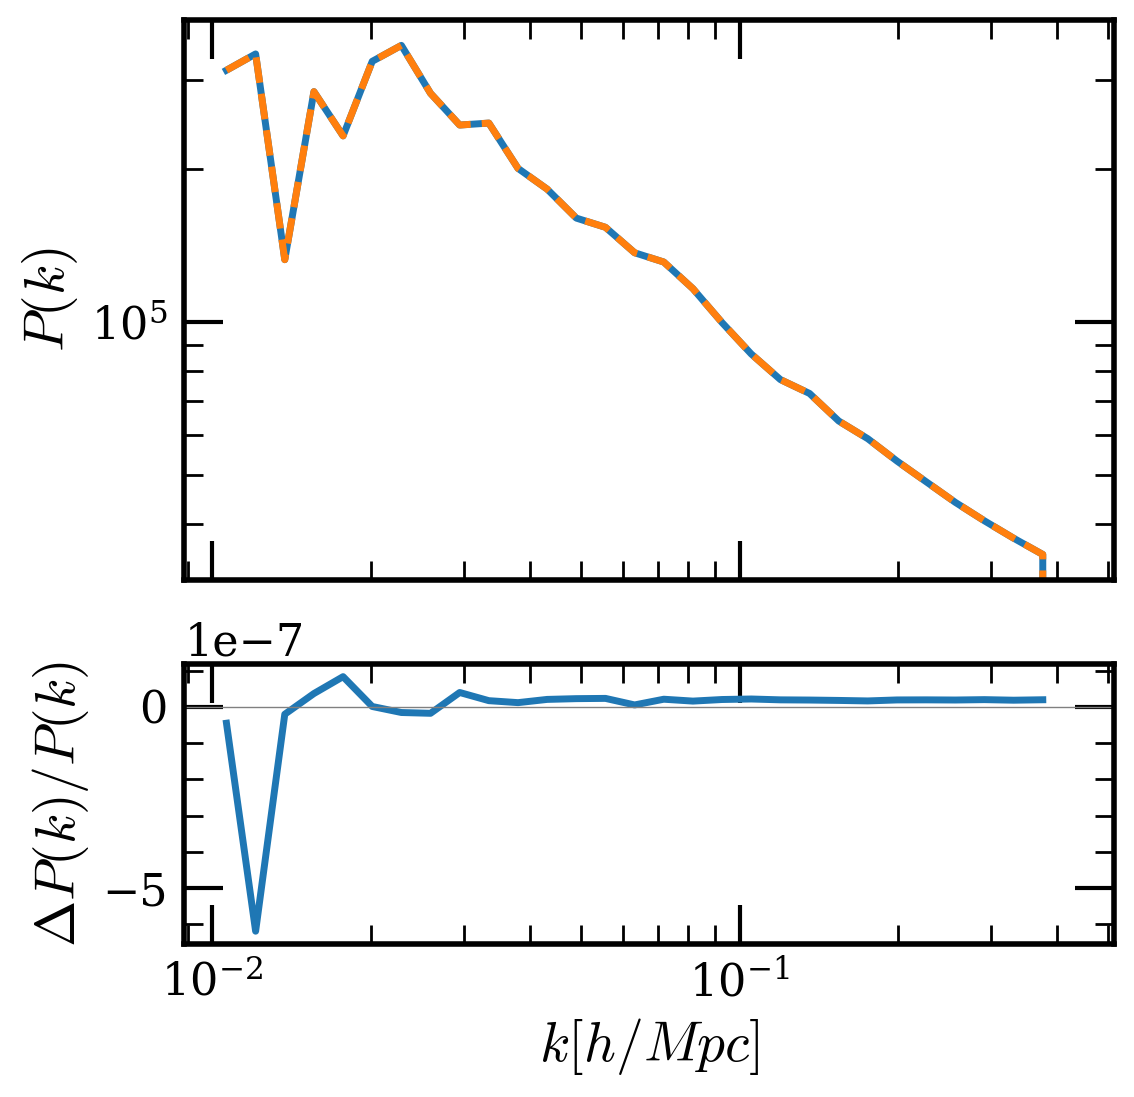

In [16]:
fig, axarr = plt.subplots(2, 1, figsize=(6,6), sharex=True, height_ratios=[2,1])
ax0, ax1 = axarr

ax0.plot(pnn[0]['k'], pk)
ax0.plot(pk_orig['k'], pk_orig['pk'], ls='--')
ax1.plot(pnn[0]['k'], pk/pk_orig['pk'] - 1.0)
ax1.axhline(0, color='grey', lw=0.5)

axarr[-1].set_xlabel(r'$k[h/Mpc]$', size=20)
ax0.set_ylabel(r'$P(k)$', size=20)
ax1.set_ylabel(r'$\Delta P(k)/P(k)$', size=20)

ax0.set_xscale('log')
ax0.set_yscale('log')